In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')


In [52]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

C:\Users\sharv\AppData\Local\Temp\ipykernel_18196\3605710231.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start=start, end = end)
[*********************100%***********************]  1 of 1 completed


In [53]:
stock_data.head()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [54]:
stock_data.tail()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644
2025-08-30,108808.070312,108929.351562,107444.445312,108409.406250,51486264208
2025-08-31,108236.710938,109491.000000,108104.656250,108818.460938,47986191770
2025-09-01,109250.593750,109890.585938,107271.179688,108228.750000,66870372995
2025-09-02,111458.710938,111653.531250,108540.929688,109243.296875,70477684736


In [55]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,4004.0,2.456707e+04,2.912998e+04,1.781030e+02,2.474982e+03,1.024181e+04,3.895247e+04,1.233441e+05
High,BTC-USD,4004.0,2.505138e+04,2.962872e+04,2.117310e+02,2.539230e+03,1.043945e+04,3.989119e+04,1.244571e+05
Low,BTC-USD,4004.0,2.400633e+04,2.855268e+04,1.715100e+02,2.338870e+03,9.971749e+03,3.770549e+04,1.189592e+05
Open,BTC-USD,4004.0,2.454047e+04,2.910114e+04,1.768970e+02,2.463738e+03,1.023515e+04,3.888525e+04,1.233394e+05
Volume,BTC-USD,4004.0,2.049393e+10,2.183213e+10,5.914570e+06,1.059482e+09,1.642862e+10,3.193457e+10,3.509679e+11


In [56]:
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4004 entries, 2014-09-17 to 2025-09-02
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   4004 non-null   float64
 1   (High, BTC-USD)    4004 non-null   float64
 2   (Low, BTC-USD)     4004 non-null   float64
 3   (Open, BTC-USD)    4004 non-null   float64
 4   (Volume, BTC-USD)  4004 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 187.7 KB


In [57]:
stock_data.columns


MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [58]:
closing_price = stock_data[['Close']]


In [59]:
closing_price['Close']


Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-08-29,108410.835938
2025-08-30,108808.070312
2025-08-31,108236.710938


c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


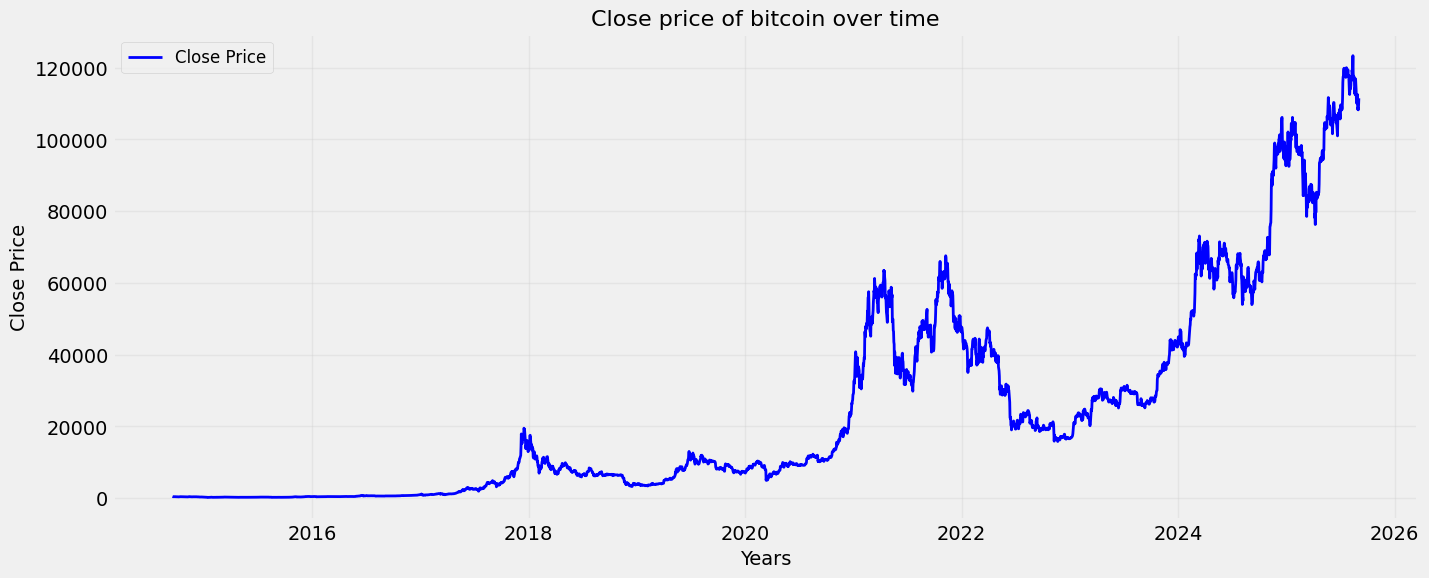

In [60]:
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [61]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))


2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [62]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


C:\Users\sharv\AppData\Local\Temp\ipykernel_18196\2488011666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\sharv\AppData\Local\Temp\ipykernel_18196\2488011666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


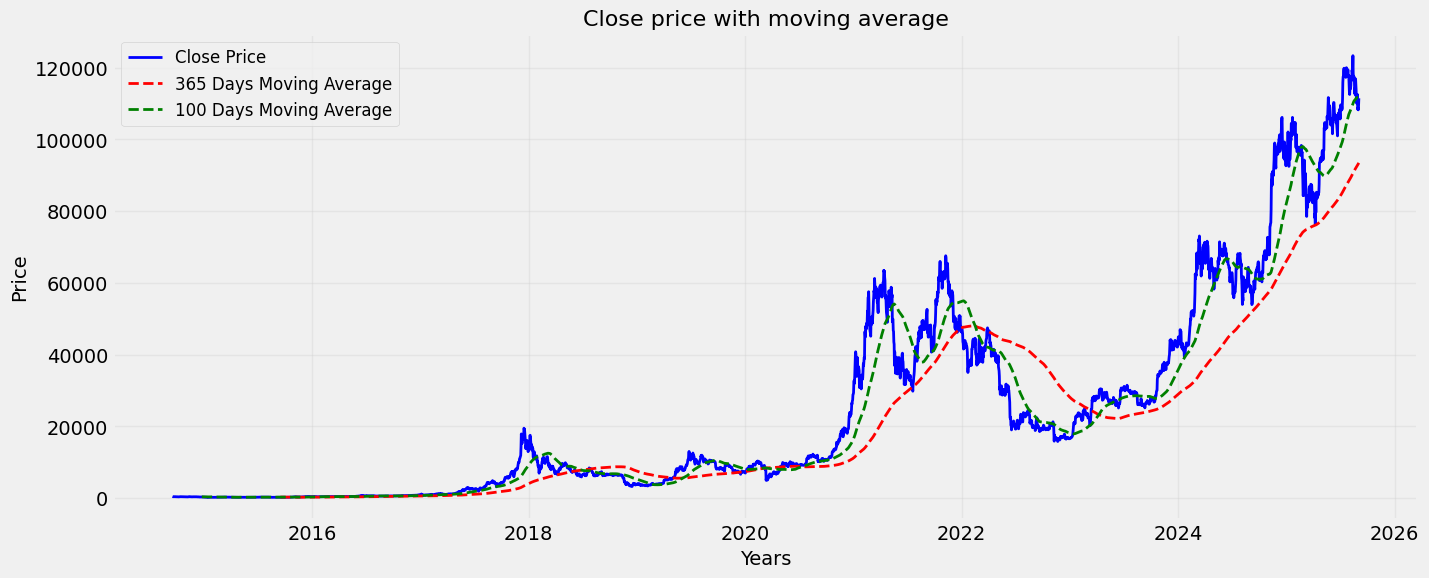

In [63]:
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())


In [65]:
len(scaled_data)

4004

In [66]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [67]:
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)


In [68]:
train_size = int(len(x_data) * 0.8)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [69]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()


c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 4.0555e-04
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 2.0456e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - loss: 1.4610e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 9.5942e-05
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 9.3804e-05
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 1.2204e-04
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - loss: 9.3103e-05
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - loss: 9.4835e-05
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - loss: 8.5406e-05
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - loss: 9.1085e-05


In [71]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


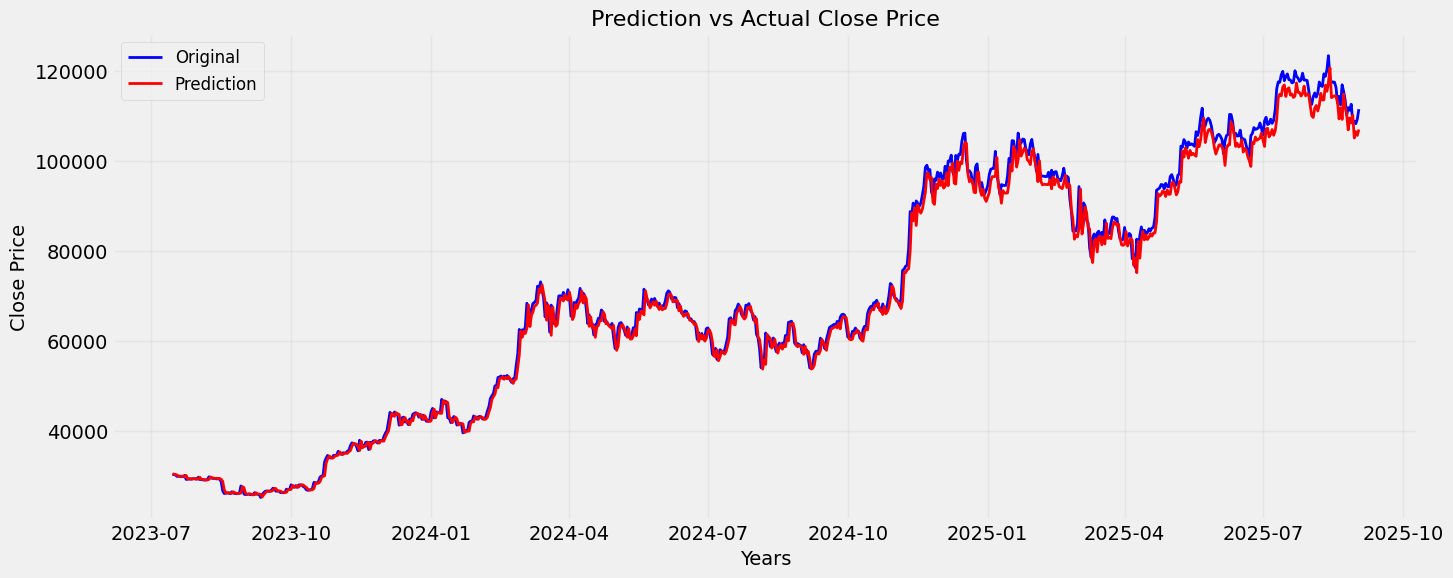

In [72]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [73]:
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\stuff\capstone_project\phase1\.venv\Lib\site-packages\tensorflow\python\framework\ops.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())


In [74]:
future_predictions


[array([[109230.85]], dtype=float32),
 array([[106235.914]], dtype=float32),
 array([[103364.83]], dtype=float32),
 array([[100695.4]], dtype=float32),
 array([[98209.84]], dtype=float32),
 array([[95881.836]], dtype=float32),
 array([[93696.32]], dtype=float32),
 array([[91647.05]], dtype=float32),
 array([[89731.05]], dtype=float32),
 array([[87944.94]], dtype=float32)]

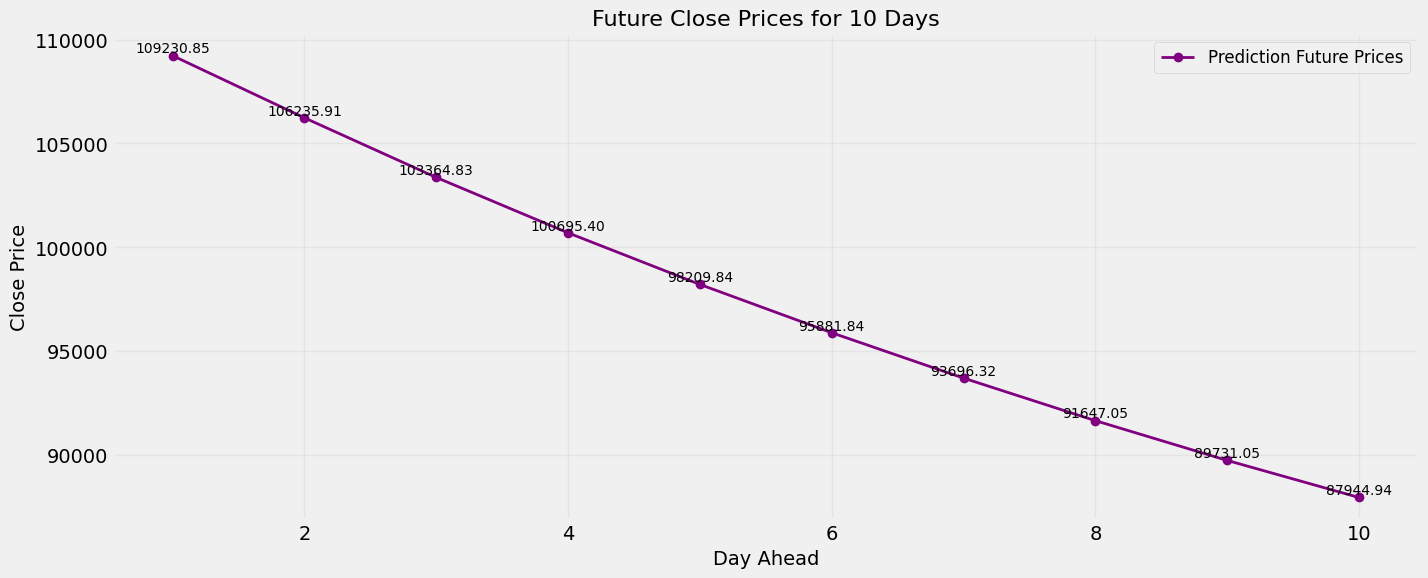

In [75]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()
